# Ripserer.jl

Example with the [Rispserer.jl](https://github.com/mtsch/Ripserer.jl) package. Dataset must be refactor as a vector of `Tuple`.

In [277]:
using Distances
using Plots
using Ripserer
using Random
using LinearAlgebra


Create some data

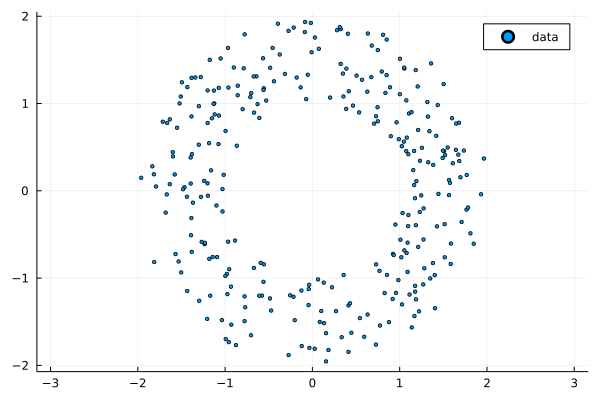

In [278]:
function annulus(n, r1=1, r2=2, offset=(0, 0))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

data = annulus(300)

scatter(data; label="data", markersize=2, aspect_ratio=1)

Ripserer computes persistent cohomology. We tell Ripserer to also compute representative cocycles with the `reps` keyword argument.
The package gives some recipes to plot the diagram

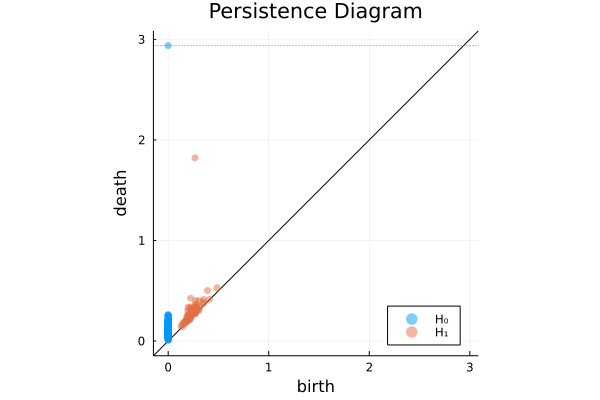

In [279]:
diagram = ripserer(data, reps=true)
plot(diagram)

The most persistent cycle of dimension 1 is the last. There are already sorted in the result.

In [280]:
most_persistent = last(diagram[2])

[0.266, 1.82) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 2017-element Chain{Mod{2},Simplex{1, Float64, Int64}}

In [281]:
representative(most_persistent)

2017-element Chain{Mod{2},Simplex{1, Float64, Int64}}:
 +Simplex{1}((106, 71), 0.26649031812969376) => 1 mod 2
 +Simplex{1}((296, 15), 0.2747019451746065) => 1 mod 2
 +Simplex{1}((126, 71), 0.29832776327054095) => 1 mod 2
 +Simplex{1}((153, 126), 0.30391019519369117) => 1 mod 2
 +Simplex{1}((227, 106), 0.30884046433499684) => 1 mod 2
 +Simplex{1}((106, 62), 0.31102872655787117) => 1 mod 2
 +Simplex{1}((160, 71), 0.311412998709848) => 1 mod 2
 +Simplex{1}((227, 160), 0.335417501080115) => 1 mod 2
 +Simplex{1}((126, 62), 0.33782437203208293) => 1 mod 2
 +Simplex{1}((227, 126), 0.34601945492727204) => 1 mod 2
 +Simplex{1}((160, 62), 0.350154641366767) => 1 mod 2
 +Simplex{1}((239, 15), 0.3575540187408135) => 1 mod 2
 +Simplex{1}((260, 153), 0.3586105185127279) => 1 mod 2
 ⋮
 +Simplex{1}((220, 16), 1.81731984299195) => 1 mod 2
 +Simplex{1}((292, 278), 1.8175074054483453) => 1 mod 2
 +Simplex{1}((273, 22), 1.8177393430791493) => 1 mod 2
 +Simplex{1}((129, 40), 1.8178053571584496) => 1 mod 2

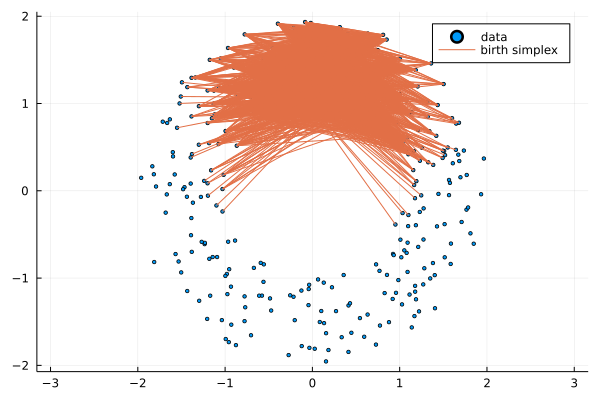

In [282]:
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent, data; label="birth simplex")

In [283]:
filtration = diagram[2].filtration

Rips{Int64, Float64}(nv=300, sparse=false)

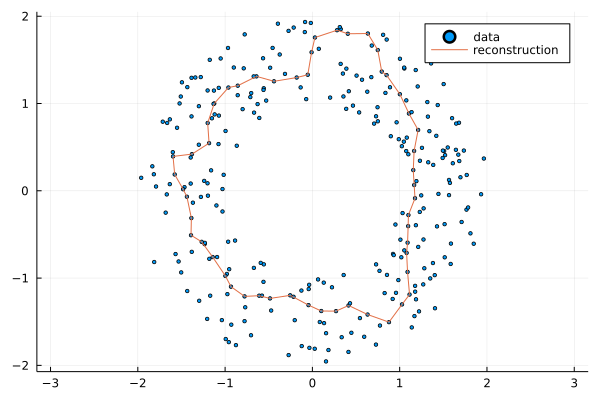

In [284]:
cycle = reconstruct_cycle(filtration, most_persistent)
scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(cycle, data; label="reconstruction")

As time goes on and more simplices are added to the filtration, the shapes of the shortest cycles change as well. The previous example was drawn at interval birth time, which is the default. Let's see what happens if we set the time to the interval midpoint.

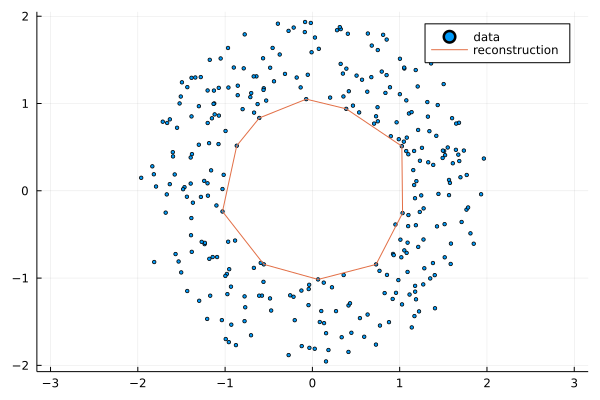

In [286]:
midpoint = (death(most_persistent) - birth(most_persistent)) / 2
reconstructed_at_midpoint = reconstruct_cycle(filtration, most_persistent, midpoint)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(reconstructed_at_midpoint, data; label="reconstruction")

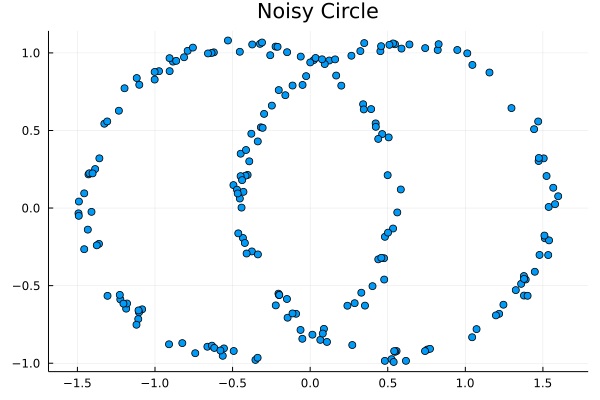

In [287]:
function noisy_circle(n; c = (0,0), r=1, noise=0.1)
    points = NTuple{2,Float64}[]
    for _ in 1:n
        θ = 2π * rand()
        push!(points, (c[1] + r * sin(θ) + noise * rand(), 
                       c[2] + r * cos(θ) + noise * rand()))
    end
    return points
end

circ_1 = noisy_circle(100, c = (-.5,0))
circ_2 = noisy_circle(100, c = (+.5,0))
data = shuffle!(vcat(circ_1,circ_2))
scatter(data; aspect_ratio=1, legend=false, title="Noisy Circle")

In [288]:
result_rips = ripserer(data, reps=true)

2-element Vector{PersistenceDiagramsBase.PersistenceDiagram}:
 200-element 0-dimensional PersistenceDiagram
 5-element 1-dimensional PersistenceDiagram

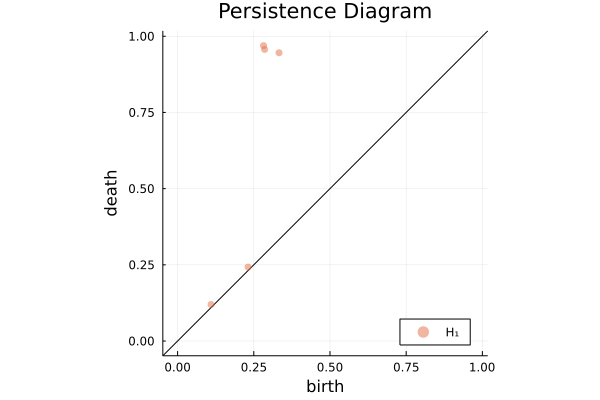

In [289]:
plot(result_rips[2])

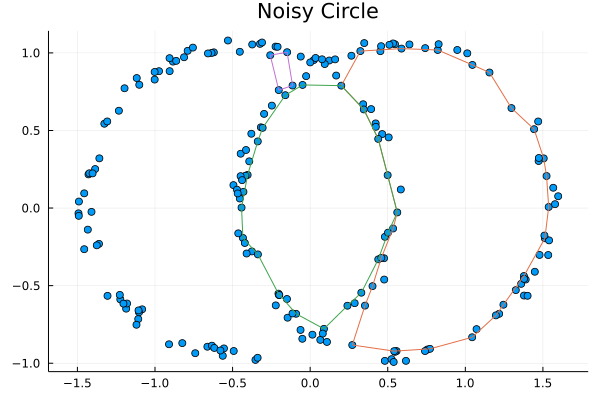

In [290]:
filtration = result_rips[2].filtration
scatter(data; aspect_ratio=1, legend=false, title="Noisy Circle")
most_persistent = result_rips[2][end]
cycle = reconstruct_cycle(filtration, most_persistent)
plot!(cycle, data)
most_persistent = result_rips[2][end-1]
cycle = reconstruct_cycle(filtration, most_persistent)
plot!(cycle, data)
most_persistent = result_rips[2][end-3]
cycle = reconstruct_cycle(filtration, most_persistent)
plot!(cycle, data)

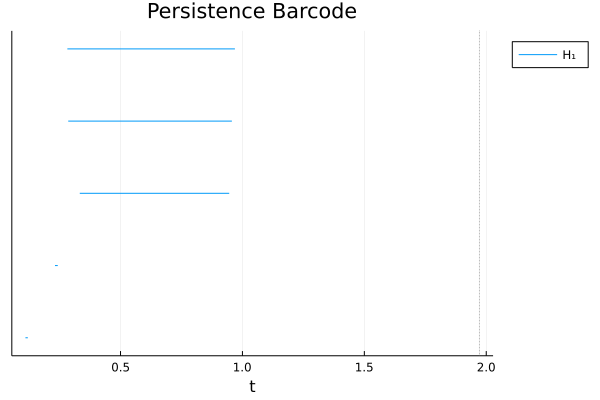

In [291]:
plot(barcode(result_rips[2]))

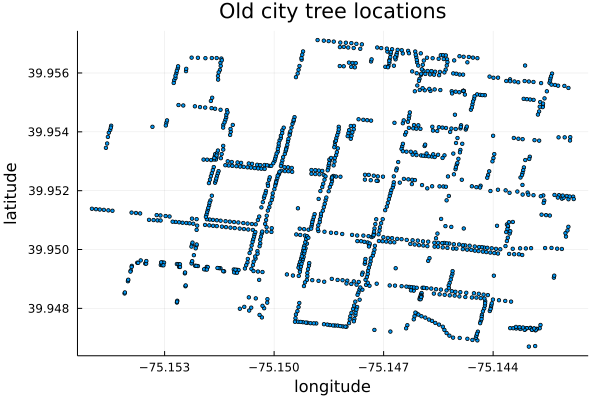

In [292]:
using CSV
using DataFrames

trees = DataFrame(CSV.File("tree_export.csv"))
treexy = hcat(trees[:, 1], trees[:, 2])
p = scatter(treexy[:, 1], treexy[:, 2], 
    legend=false, 
    markersize = 2,
    title = "Old city tree locations", 
    xlabel = "longitude",
    ylabel = "latitude")

Create dataset for Ripserer and remove duplicated trees

In [293]:
data = [(tree[1],tree[2]) for tree in eachrow(unique(treexy,dims=1))]
rips = ripserer( data, alg=:involuted)

2-element Vector{PersistenceDiagramsBase.PersistenceDiagram}:
 1120-element 0-dimensional PersistenceDiagram
 215-element 1-dimensional PersistenceDiagram

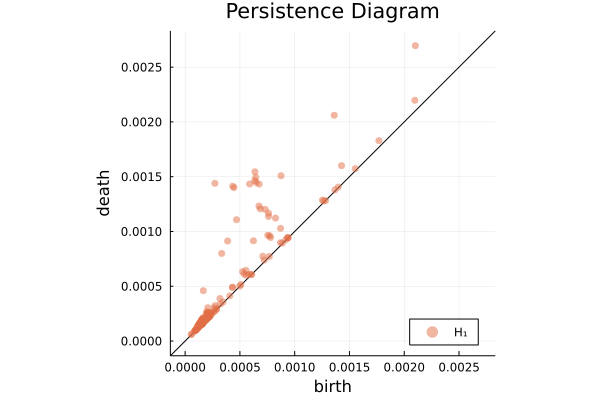

In [294]:
plot(rips[2])

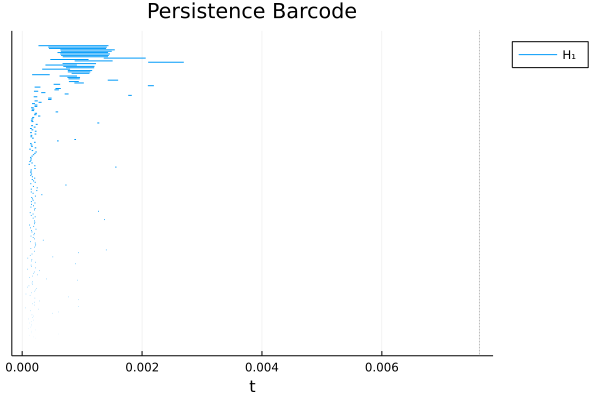

In [295]:
plot(barcode(rips[2]))

[0.000272, 0.00144) with:
 birth_simplex: Simplex{1, Float64, Int64}
 death_simplex: Simplex{2, Float64, Int64}
 representative: 45-element Chain{Mod{2},Simplex{1, Float64, Int64}}

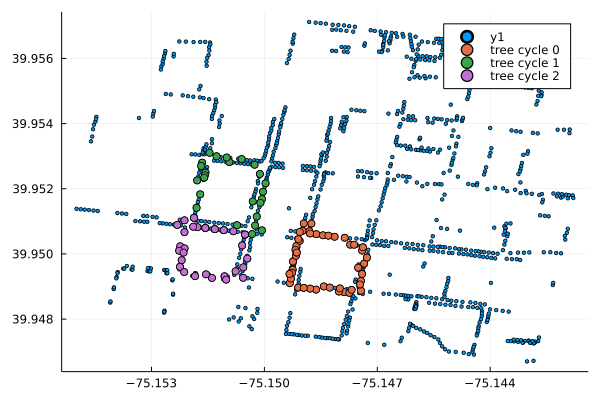

In [302]:
p = scatter(data, markersize=2)
for i in 0:2
    most_persistent = rips[2][end-i]
    scatter!(p, most_persistent, data; label="tree cycle $i")
end
display(p)